IMDB EDA PROJECT

Loading the dataset and Perform initial setup

In [5]:
# Importing necessary libraries for the project
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the dataset
Data ="imdb_movies.csv"
df = pd.read_csv(Data)
#Convert date_x to datetime and extract the year
df['year'] = pd.to_datetime(df['date_x'], errors='coerce').dt.year
# Drop rows with NaN years
df = df.dropna(subset=['year'])
#Convert year to integer
df['year'] = df['year'].astype(int)

# Display the top 5 rows of datasets
df.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country,year
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU,2023
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU,2022
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU,2023
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU,2023
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US,2023


Data Overview and Basic Exploration

In [3]:
# Display the shape and first few rows of the dataset
print("Shape of the dataset:", df.shape)

df.info()

Shape of the dataset: (10178, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  object 
 1   date_x      10178 non-null  object 
 2   score       10178 non-null  float64
 3   genre       10093 non-null  object 
 4   overview    10178 non-null  object 
 5   crew        10122 non-null  object 
 6   orig_title  10178 non-null  object 
 7   status      10178 non-null  object 
 8   orig_lang   10178 non-null  object 
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  object 
dtypes: float64(3), object(9)
memory usage: 954.3+ KB


In [4]:
#Convert data type of date_x into datetime 
df["date_x"]= pd.to_datetime(df["date_x"])

In [5]:
# Checking the datatype again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   names       10178 non-null  object        
 1   date_x      10178 non-null  datetime64[ns]
 2   score       10178 non-null  float64       
 3   genre       10093 non-null  object        
 4   overview    10178 non-null  object        
 5   crew        10122 non-null  object        
 6   orig_title  10178 non-null  object        
 7   status      10178 non-null  object        
 8   orig_lang   10178 non-null  object        
 9   budget_x    10178 non-null  float64       
 10  revenue     10178 non-null  float64       
 11  country     10178 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(8)
memory usage: 954.3+ KB


In [6]:
# Summary statistics for numerical columns
df.describe()

,date_x,score,budget_x,revenue
count,10178,10178.000000,1.017800e+04,1.017800e+04
mean,2008-06-15 06:16:37.445470720,63.497052,6.488238e+07,2.531401e+08
min,1903-05-15 00:00:00,0.000000,1.000000e+00,0.000000e+00
25%,2001-12-25 06:00:00,59.000000,1.500000e+07,2.858898e+07
50%,2013-05-09 00:00:00,65.000000,5.000000e+07,1.529349e+08
75%,2019-10-17 00:00:00,71.000000,1.050000e+08,4.178021e+08
max,2023-12-31 00:00:00,100.000000,4.600000e+08,2.923706e+09
std,NaN,13.537012,5.707565e+07,2.777880e+08


In [7]:
# Checking for missing values and their counts
df.isnull().sum()

names          0
date_x         0
score          0
genre         85
overview       0
crew          56
orig_title     0
status         0
orig_lang      0
budget_x       0
revenue        0
country        0
dtype: int64

Data Cleaning

In [8]:
#Missing Values
#85 missing values in Genre column which contains Genres of movies
#Filling Genre with "Unavaiable" as its an object type
df["genre"]=df["genre"].fillna("unavaiable")

In [9]:
#56 missing values in Crew column which contains Cast and crew information
#Filling it same with "Unavaiable" as its also an object type
df["crew"]=df["crew"].fillna("unavaiable")

Univariate Analysis: Explore each column individually

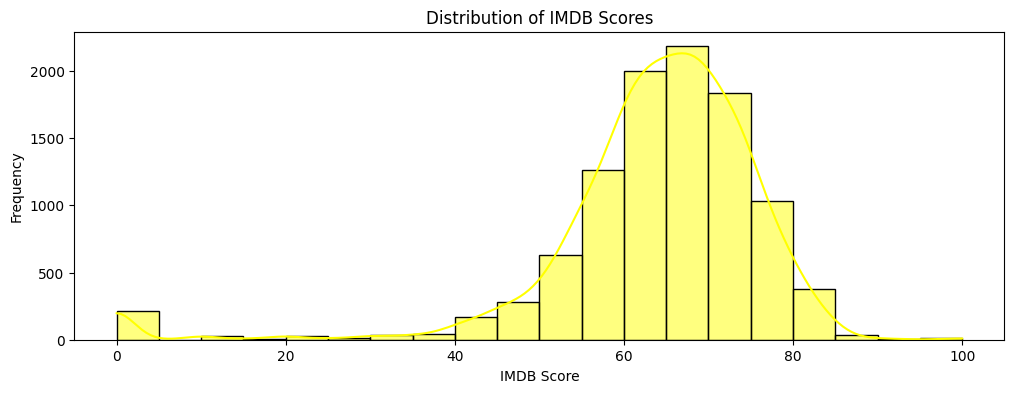

The distribution of IMDB scores shows that:
- It appears to be approximately normal but slightly left-skewed (tail on the lower end).
- Most scores are concentrated between 50 and 80, with a gradual decline outside this range.
- There are very few movies with extremely low or perfect scores (0 or 100).


In [17]:
# Analyze the distribution of IMDB ratings (`score`) using a histogram and describe its shape

# Plotting the distribution of IMDB scores
plt.figure(figsize=(12, 4))
sns.histplot(df["score"], kde=True, bins=20, color="yellow")
plt.title("Distribution of IMDB Scores")
plt.xlabel("IMDB Score")
plt.ylabel("Frequency")
plt.show()

# Description of the shape
print("The distribution of IMDB scores shows that:")
print("- It appears to be approximately normal but slightly left-skewed (tail on the lower end).")
print("- Most scores are concentrated between 50 and 80, with a gradual decline outside this range.")
print("- There are very few movies with extremely low or perfect scores (0 or 100).")

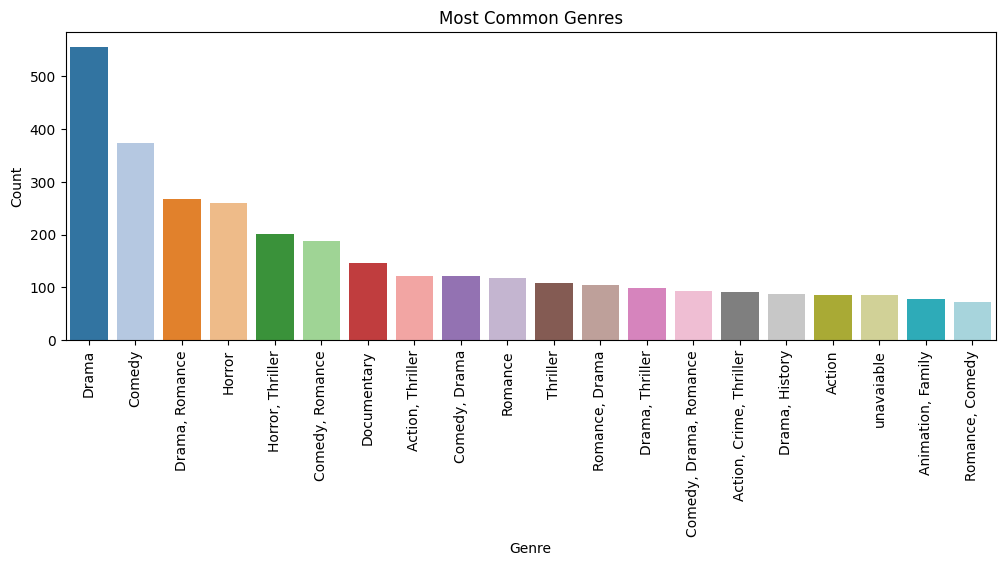

The most common genre in the dataset is: Drama


In [32]:
# What are the most common genres in the dataset? Use a bar chart to show their distribution.

# Group by genre and count the number of movies
gb = df.groupby("genre").agg({"names": "count"})
gb = gb.sort_values(by="names", ascending=False)
gb = gb.head(20)

# Plotting the bar chart
plt.figure(figsize=(12, 4))
sns.barplot(x=gb.index,y=gb["names"],data=gb,hue=gb.index,palette="tab20")
plt.title("Most Common Genres")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

# Print the most common genre
most_common_genre = gb.index[0]
print(f"The most common genre in the dataset is: {most_common_genre}")

Bivariate Analysis: Explore relationships between two variables

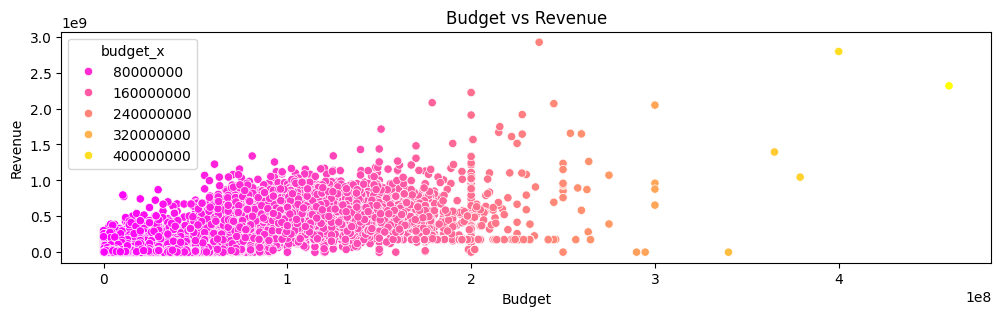

The relationship of budget and  revenue shows that:
- There is a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues.
- Most movies are clustered around mid-range budgets (e.g., 80 million).
- Outliers show both successes (high revenue, high budget) and failures (high budget, low revenue).


In [33]:
# Explore the relationship between `budget_x` and `revenue` using a scatter plot.  
# Plotting the Scatter plot
plt.figure(figsize=(12,3))
sns.scatterplot(x="budget_x", y = "revenue",data = df, hue = "budget_x", palette = "spring")
plt.title("Budget vs Revenue")
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

# Description observed trend
print("The relationship of budget and  revenue shows that:")
print("- There is a positive correlation between budget and revenue. Movies with higher budgets tend to generate higher revenues.")
print("- Most movies are clustered around mid-range budgets (e.g., 80 million).")
print("- Outliers show both successes (high revenue, high budget) and failures (high budget, low revenue).")

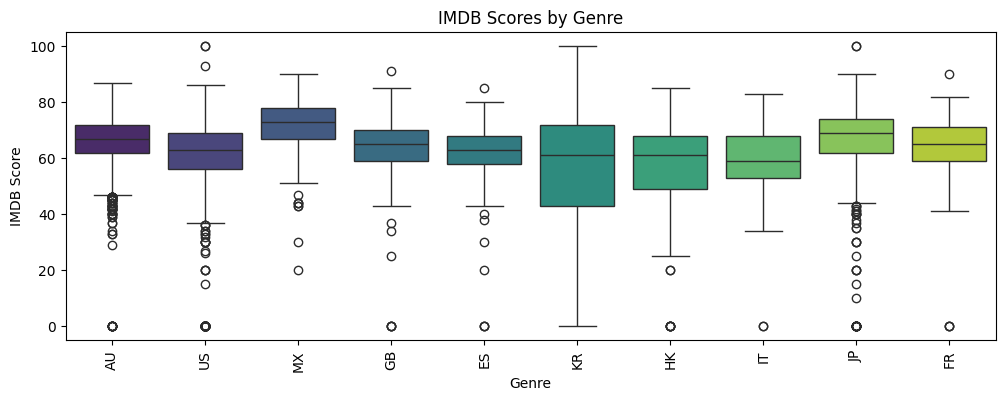

The IMDB score across contries:
- The distribution of ratings varies significantly across countries.
- Some countries exhibit tighter distributions, while others have a wider range of scores.
-The median rating differs by country, providing insight into regional preferences and quality of movies.


In [34]:
# Compare IMDB ratings (`score`) across Country using a boxplot. 

# Boxplot for IMDB score across countries
top_countries = df["country"].value_counts().head(10).index  # Top 10 countries by movie count
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[df["country"].isin(top_countries)], x="country", y="score", hue="country", palette="viridis", legend=False)
plt.title("IMDB Scores by Genre")
plt.xlabel("Genre")
plt.ylabel("IMDB Score")
plt.xticks(rotation=90)
plt.show()

# Description 
print("The IMDB score across contries:")
print("- The distribution of ratings varies significantly across countries.")
print("- Some countries exhibit tighter distributions, while others have a wider range of scores.")
print("-The median rating differs by country, providing insight into regional preferences and quality of movies.")

In [35]:
#Is there a correlation between the number of votes a movie received and its rating? Create a scatter plot and calculate the correlation coefficient.
# Create a dataframe to store score, budget and revenue and find it's correlation
df1 = df[["score", "budget_x", "revenue"]]
df1.columns = ["Score","Budget", "Revenue"]
corr = df1.corr()
corr

,Score,Budget,Revenue
Score,1.000000,-0.23547,0.096533
Budget,-0.235470,1.00000,0.673830
Revenue,0.096533,0.67383,1.000000


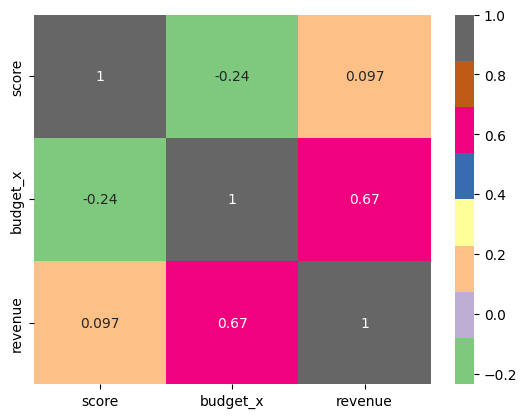

The Correlation between budget, score and revenue:
- Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases..
- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.
-Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well


In [40]:
#correlation between `budget_x`, 'revenue' and `score`. 
correlation = df[["score","budget_x","revenue"]]
data = correlation.corr()
sns.heatmap(data, annot = True, cmap = "Accent")
plt.show()

# Description 
print("The Correlation between budget, score and revenue:")
print("- Score and Budget: A weak negative correlation of -0.235, meaning as the budget increases, the score slightly decreases..")
print("- Score and Revenue: A very weak positive correlation of 0.097, suggesting little to no relationship between score and revenue.")
print("-Budget and Revenue: A moderate positive correlation of 0.674, indicating that as the budget increases, revenue tends to increase as well")

Genre-Specific Analysiss

In [53]:
# Which genre has the highest average rating? Calculate the average rating for each genre and plot the results.

# Calculate the average rating for each genre
avg_rating_by_genre= df.groupby("genre")["score"].mean().sort_values(ascending=False)
avg_rating_by_genre = avg_rating_by_genre.head(10)
print("\nAverage Ratings by Genre:")
print(avg_rating_by_genre)


Average Ratings by Genre:
genre
Fantasy, Drama, Crime                                 85.000000
Adventure, Animation, Comedy, Fantasy, Mystery        85.000000
Romance, Animation, Drama                             85.000000
Animation, Comedy, Romance                            84.666667
Family, Animation, Drama                              83.000000
Animation, Action, Comedy, Mystery, Crime, Fantasy    83.000000
Animation, Action, Science Fiction, Drama             83.000000
Animation, Action, Adventure, Fantasy, Thriller       83.000000
Animation, Family, Fantasy, Adventure, Comedy         83.000000
Adventure, Fantasy, Animation                         83.000000
Name: score, dtype: float64


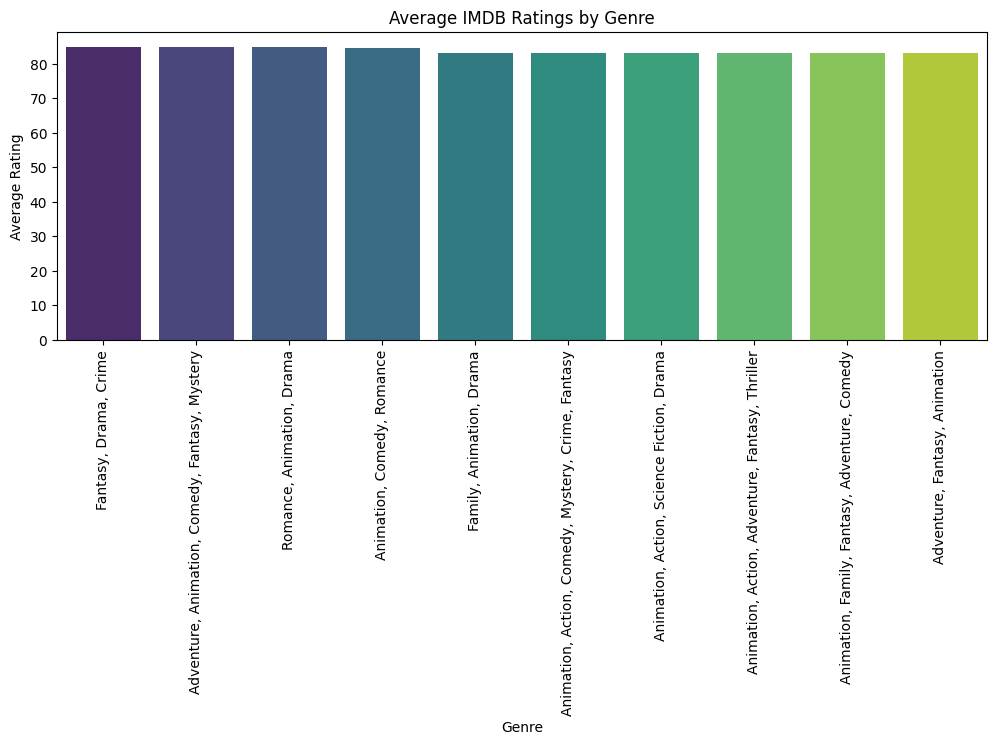

The Average rating for each genre shows that:
- It appears that (Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest score.


In [54]:
# Plot the graph of average score across genres
plt.figure(figsize=(12, 4))
sns.barplot(x=avg_rating_by_genre.index, y=avg_rating_by_genre.values, hue=avg_rating_by_genre.index, palette='viridis', legend=False)
plt.title("Average IMDB Ratings by Genre")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=90)
plt.show()

# Description 
print("The Average rating for each genre shows that:")
print("- It appears that (Fantasy, Drama, Crime)(Adventure, Animation, Comedy, Fantasy, Mystery)(Romance, Animation, Drama) have highest score.") 

In [55]:
# How does the popularity of genres vary over time? Plot the number of movies released per genre each year.

# Convert 'date_x' to datetime format if it's not already
df['date_x'] = pd.to_datetime(df['date_x'], errors='coerce')

# Extract the year from the 'date_x' column
df['year'] = df['date_x'].dt.year

# Check if the 'year' column is created correctly
print(df[['date_x', 'year']].head())

      date_x  year
0 2023-03-02  2023
1 2022-12-15  2022
2 2023-04-05  2023
3 2023-01-05  2023
4 2023-03-17  2023


In [56]:
# Group by 'genre' and 'year', then count movies
movies_per_genre = df.groupby(['year', 'genre']).size().reset_index(name='movie_count')
top_genres = movies_per_genre.groupby('genre')['movie_count'].sum().nlargest(10).index

# Filter the movies data to include only these top genres
filtered_movies = movies_per_genre[movies_per_genre['genre'].isin(top_genres)]

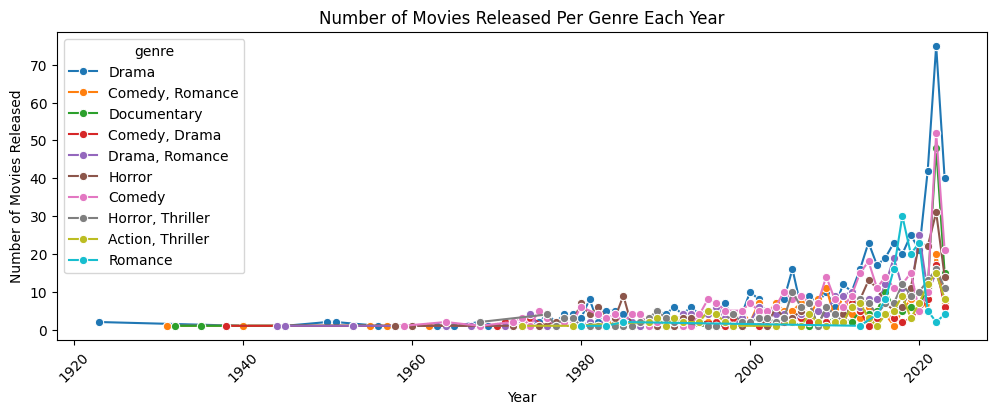

In [57]:
# Plotting Line 
plt.figure(figsize=(12,4))
sns.lineplot(data=filtered_movies, x='year', y='movie_count', hue='genre', marker='o')
plt.title("Number of Movies Released Per Genre Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")
plt.xticks(rotation=45)
plt.show()

In [58]:
# Compare budgets and revenues for specific genres.

# Filter data for specific genres
selected_genres = ['Action', 'Comedy', 'Drama']
df_selected_genres = df[df['genre'].isin(selected_genres)]

# Check the first few rows of the filtered data
print(df_selected_genres[['genre', 'budget_x', 'revenue']].head())

     genre    budget_x      revenue
4   Action  77000000.0  340941958.6
22   Drama  25000000.0  622313635.0
42  Action   1000000.0   22790427.2
44   Drama   3000000.0   36752010.0
54  Comedy  51880004.0    9263009.0


In [59]:
# Group by 'genre' and calculate the average budget and revenue
genre_comparison = df_selected_genres.groupby('genre')[['budget_x', 'revenue']].mean()

# Check the result
print(genre_comparison)

            budget_x       revenue
genre                             
Action  4.698863e+07  1.962566e+08
Comedy  5.767277e+07  2.052982e+08
Drama   6.068989e+07  2.495831e+08


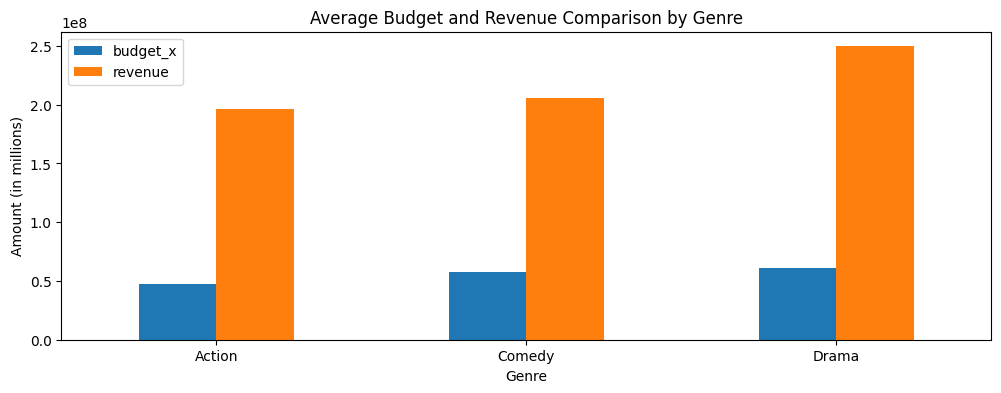

The Average Budget and revenue comparison by genre shows that:
- It shows that Drama Genre needs high budget.
- It also shows Action takes less budget than comdey and drama genre


In [60]:
# Plot the comparison of average budget and revenue per genre
genre_comparison.plot(kind='bar', figsize=(12,4 ))
plt.title("Average Budget and Revenue Comparison by Genre")
plt.xlabel("Genre")
plt.ylabel("Amount (in millions)")
plt.xticks(rotation=0)
plt.show()

# Description 
print("The Average Budget and revenue comparison by genre shows that:")
print("- It shows that Drama Genre needs high budget.")
print("- It also shows Action takes less budget than comdey and drama genre")

Year and Trend Analysis

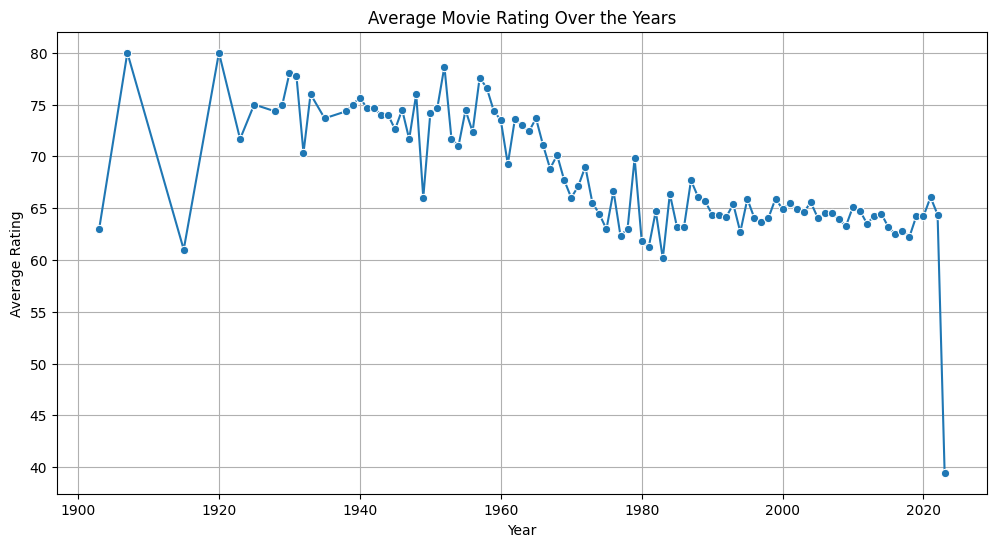

In [8]:
#Plot average movie rating over the years
avg_rating_per_year = df.groupby('year')['score'].mean()
plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_rating_per_year.index, y=avg_rating_per_year.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

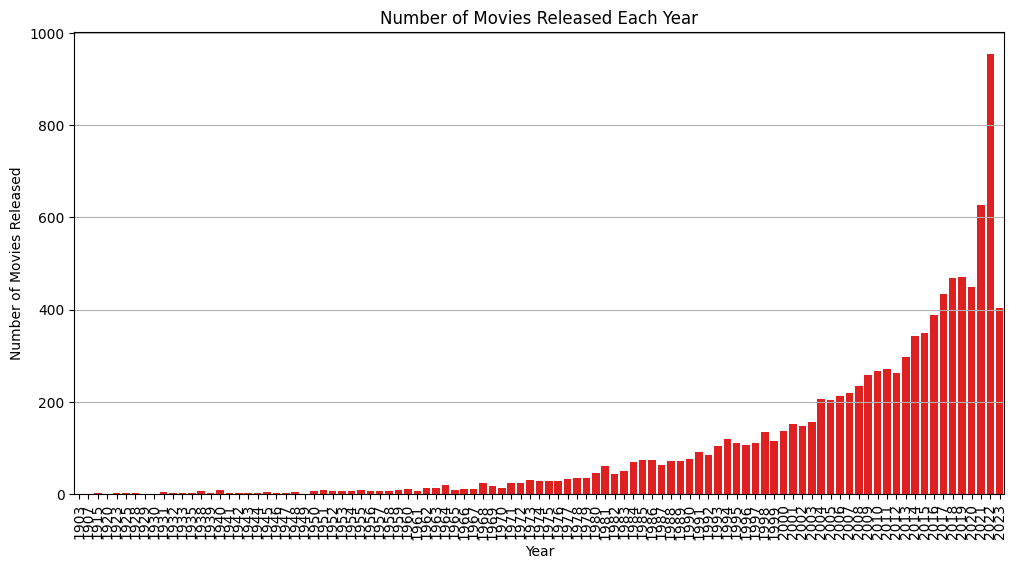

In [13]:
#Plot number of movies released per year
movies_per_year = df['year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=movies_per_year.index, y=movies_per_year.values, color ='red')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released Each Year')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

Multivariate Analysis: Analyze multiple variables together.

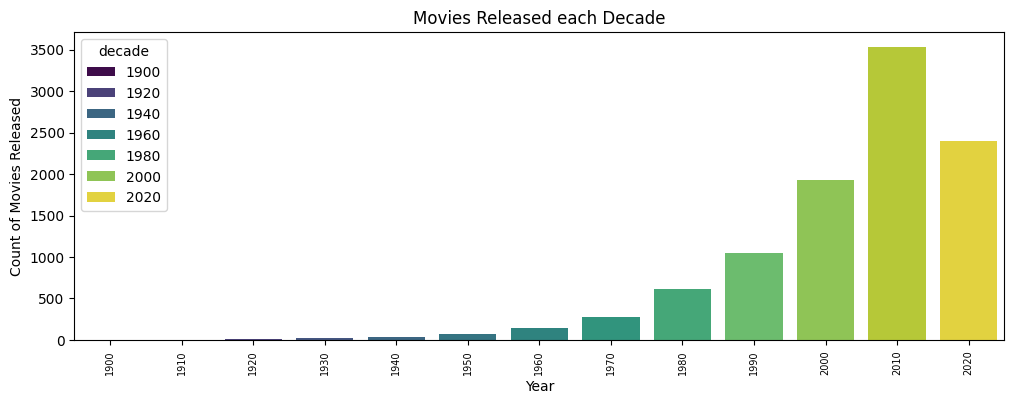

The Movies released each decade plot shows that:
- It shows in 2010 most movies was popular 


In [16]:
# Which genres are most popular in each decade? Create a bar plot showing the most frequent genres by decade.

# Extract the decade from the 'year' column
df['decade'] = (df['year'] // 10) * 10  # Dividing year by 10 and multiplying by 10 to get the start of the decade

# Plot the number of movies released each decade
gb = df.groupby('decade').agg({'genre':'count'})
plt.figure(figsize = (12, 4))
sns.barplot(x = gb.index, y = gb['genre'], data = gb, hue = gb.index, palette = 'viridis')
plt.ylabel('Count of Movies Released')
plt.xlabel('Year')
plt.title('Movies Released each Decade')
plt.xticks(rotation = 90, fontsize = 7)
plt.show()

# Description 
print("The Movies released each decade plot shows that:")
print("- It shows in 2010 most movies was popular ")

In [17]:
# Analyze the influence of `budget_x`, `genre`, and `country` on revenues using a heatmap.

# Select the relevant columns and drop any missing values
df_corr = df[['budget_x', 'genre', 'country', 'revenue']].dropna()

# Convert categorical columns into numeric values
df_corr['genre'] = pd.factorize(df_corr['genre'])[0]
df_corr['country'] = pd.factorize(df_corr['country'])[0]

# Calculate the correlation between the variables
corr_matrix = df_corr.corr()

print(corr_matrix)

          budget_x     genre   country   revenue
budget_x  1.000000 -0.008550  0.159005  0.680372
genre    -0.008550  1.000000 -0.018373 -0.010409
country   0.159005 -0.018373  1.000000  0.145098
revenue   0.680372 -0.010409  0.145098  1.000000


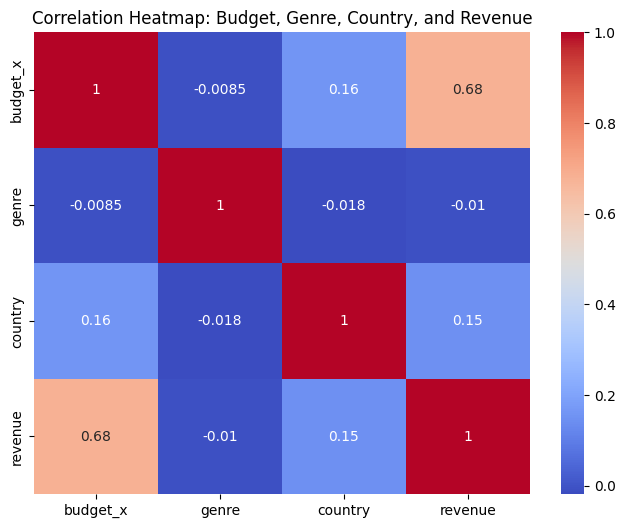

The correlation Heatmap shows that:
- Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue
- Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly impact budget or revenue.
-Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenue.


In [18]:
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap: Budget, Genre, Country, and Revenue")
plt.show()

# Description 
print("The correlation Heatmap shows that:")
print("- Budget and revenue are positively correlated (0.67), suggesting that higher-budget movies tend to generate more revenue")
print("- Genre and country have very weak correlations with other variables, indicating that the genre or the country of production does not strongly impact budget or revenue.")
print("-Country has a weak positive correlation with revenue suggesting that movies from certain countries might tend to have slightly higher revenue.")